<a href="https://colab.research.google.com/github/nivikarthick/Image-Colourization/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def rgb_to_gray(img):
    return 0.299*img[:, 0, :, :] + 0.587*img[:, 1, :, :] + 0.114*img[:, 2, :, :]
def visualize_all(original, gray, colorized):
    n = min(5, len(original))
    fig, axes = plt.subplots(3, n, figsize=(12, 6))

    for i in range(n):
        axes[0, i].imshow(original[i].permute(1,2,0))
        axes[0, i].set_title("Original")

        axes[1, i].imshow(gray[i], cmap="gray")
        axes[1, i].set_title("Grayscale")

        axes[2, i].imshow(colorized[i].permute(1,2,0))
        axes[2, i].set_title("Colorized")

        for j in range(3):
            axes[j, i].axis("off")

    plt.show()
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 3, 3, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_data  = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=16, shuffle=False)
model = ColorizationNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    for images, _ in train_loader:
        images = images.to(device)
        gray = rgb_to_gray(images).unsqueeze(1)

        output = model(gray)
        loss = criterion(output, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch:", epoch+1, "Loss:", loss.item())

100%|██████████| 170M/170M [00:03<00:00, 43.8MB/s]


Epoch: 1 Loss: 0.009024917148053646
Epoch: 2 Loss: 0.006479769945144653
Epoch: 3 Loss: 0.004832706414163113


100%|██████████| 170M/170M [00:02<00:00, 76.7MB/s]


Epoch: 1 Loss: 0.007240152917802334
Epoch: 2 Loss: 0.0069805472157895565
Epoch: 3 Loss: 0.00722898542881012


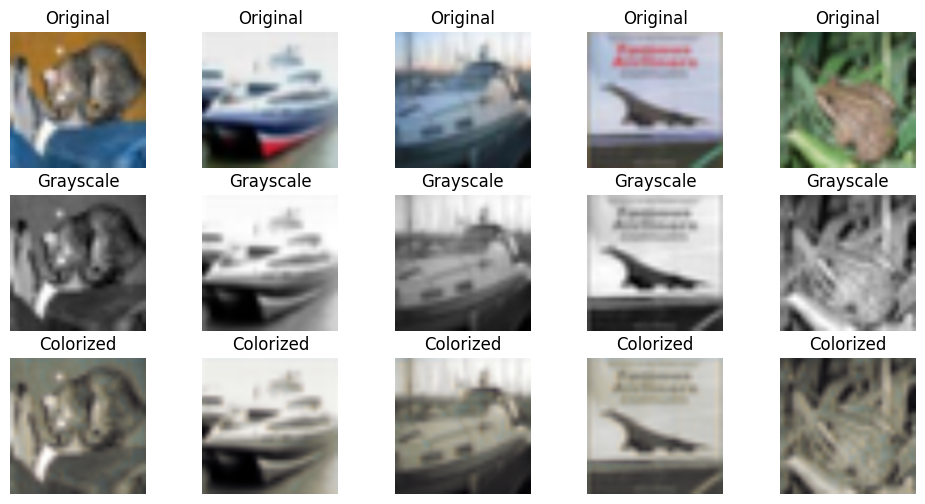

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def rgb_to_gray(img):
    return 0.299*img[:, 0, :, :] + 0.587*img[:, 1, :, :] + 0.114*img[:, 2, :, :]
def visualize_all(original, gray, colorized):
    n = min(5, len(original))
    fig, axes = plt.subplots(3, n, figsize=(12, 6))

    for i in range(n):
        axes[0, i].imshow(original[i].permute(1,2,0))
        axes[0, i].set_title("Original")

        axes[1, i].imshow(gray[i], cmap="gray")
        axes[1, i].set_title("Grayscale")

        axes[2, i].imshow(colorized[i].permute(1,2,0))
        axes[2, i].set_title("Colorized")

        for j in range(3):
            axes[j, i].axis("off")

    plt.show()
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 3, 3, padding=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.sigmoid(self.conv4(x))
        return x
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_data  = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=16, shuffle=False)
model = ColorizationNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(3):
    for images, _ in train_loader:
        images = images.to(device)
        gray = rgb_to_gray(images).unsqueeze(1)

        output = model(gray)
        loss = criterion(output, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch:", epoch+1, "Loss:", loss.item())
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        images = images.to(device)
        gray = rgb_to_gray(images).unsqueeze(1)

        output = model(gray)

        visualize_all(
            images.cpu(),
            gray.cpu().squeeze(1),
            output.cpu()
        )

        break

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg to WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg


In [ ]:
from PIL import Image
img = Image.open('WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg')
gray_img = img.convert("L")

In [ ]:
import torchvision.transforms as transforms
transform = transforms.Compose([
transforms.ToTensor(),
])

In [ ]:
!ls

sample_data


In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Kept for potential future use, though direct tensor-to-numpy conversion is often sufficient for imshow
import torch # Ensure torch is imported if dealing with tensors

# The problematic custom imshow function definition was removed, as it was malformed and redundant.
# The notebook already has a working 'visualize_all' function, and 'plt.imshow' is directly usable.

def visualize_all_three(original_images, grayscale_images, colorized_images, n=5):
    """
    Visualizes original, grayscale, and colorized versions of images side-by-side in a single row for each set.
    Assumes inputs are PyTorch tensors.
    """
    # Ensure n does not exceed the number of available images
    num_images_to_display = min(n, len(original_images), len(grayscale_images), len(colorized_images))

    # The user's original layout suggestion was (1, 3*n) for subplot, implying 1 row and 3*n columns.
    # We will adhere to this structure, placing Original, Grayscale, and Colorized images side-by-side for each set.
    fig = plt.figure(figsize=(num_images_to_display * 6, 6)) # Adjusted figsize for better visual spacing

    for i in range(num_images_to_display):
        # Original Image
        ax = fig.add_subplot(1, 3 * num_images_to_display, 3 * i + 1)
        # Convert PyTorch tensor (C, H, W) to NumPy array (H, W, C) for matplotlib
        ax.imshow(original_images[i].permute(1, 2, 0).cpu().numpy())
        ax.set_title("Original")
        ax.axis('off')

        # Grayscale Image
        ax = fig.add_subplot(1, 3 * num_images_to_display, 3 * i + 2)
        # Grayscale images are typically 1 channel, so squeeze and use cmap='gray'
        ax.imshow(grayscale_images[i].squeeze(0).cpu().numpy(), cmap='gray')
        ax.set_title("Grayscale")
        ax.axis('off')

        # Colorized Image
        ax = fig.add_subplot(1, 3 * num_images_to_display, 3 * i + 3)
        # Convert PyTorch tensor (C, H, W) to NumPy array (H, W, C) for matplotlib
        ax.imshow(colorized_images[i].permute(1, 2, 0).cpu().numpy())
        ax.set_title("Colorized")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

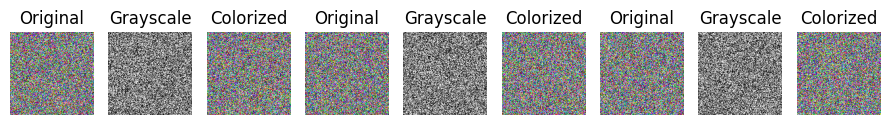

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np # For .numpy() conversion

# Define placeholder variables for demonstration purposes.
# In a real scenario, these would come from your model's output or data loader.
n = 3 # Number of images to display
# Example tensors (replace with your actual data if you have it from a previous step)
original_images = [torch.rand(3, 128, 128) for _ in range(n)] # Batch of 3-channel images
grayscale_images = [torch.rand(1, 128, 128) for _ in range(n)] # Batch of 1-channel grayscale images
colorized_images = [torch.rand(3, 128, 128) for _ in range(n)] # Batch of 3-channel colorized images


fig = plt.figure(figsize=(3*n, 4)) # Corrected assignment and multiplication operator

for i in range(n):

    ax = fig.add_subplot(1, 3*n, 3*i+1) # Corrected assignment and multiplication operator, using fig.add_subplot
    ax.imshow(original_images[i].permute(1,2,0).cpu().numpy()) # Convert tensor to numpy for imshow
    ax.set_title("Original")
    ax.axis("off")

    # Display original grayscale image
    ax = fig.add_subplot(1, 3*n, 3*i + 2) # Corrected assignment and multiplication operator, using fig.add_subplot
    ax.imshow(grayscale_images[i].squeeze(0).cpu().numpy(), cmap='gray') # Convert tensor, squeeze channel, use grayscale cmap
    ax.set_title("Grayscale")
    ax.axis("off")

    # Display colorized image
    ax = fig.add_subplot(1, 3*n, 3*i + 3) # Corrected assignment and multiplication operator, using fig.add_subplot
    ax.imshow(colorized_images[i].permute(1,2,0).cpu().numpy()) # Convert tensor to numpy for imshow
    ax.set_title("Colorized")
    ax.axis("off")

plt.tight_layout() # Corrected function name

plt.show() # Corrected function call

In [ ]:
import torch

def torch_rgb_to_hsv(rgb):
    # rgb: (N, 3, H, W) in range [0, 1]

    # Separate channels
    r, g, b = rgb[:, 0, :, :], rgb[:, 1, :, :], rgb[:, 2, :, :]

    max_val = torch.max(rgb, dim=1).values
    min_val = torch.min(rgb, dim=1).values

    diff = max_val - min_val

    # Initialize H, S, V
    h = torch.zeros_like(max_val)
    s = torch.zeros_like(max_val)
    v = max_val # Value is simply the max_val

    # Compute Saturation
    # If max_val is 0, saturation is 0 (black)
    s[max_val != 0] = diff[max_val != 0] / max_val[max_val != 0]

    # Compute Hue
    # If diff is 0, hue is 0 (achromatic)

    # R is max
    mask_r = (max_val == r) & (diff != 0)
    h[mask_r] = (g[mask_r] - b[mask_r]) / diff[mask_r]

    # G is max
    mask_g = (max_val == g) & (diff != 0)
    h[mask_g] = (b[mask_g] - r[mask_g]) / diff[mask_g] + 2.0

    # B is max
    mask_b = (max_val == b) & (diff != 0)
    h[mask_b] = (r[mask_b] - g[mask_b]) / diff[mask_b] + 4.0

    h = (h / 6.0) % 1.0 # Normalize hue to [0, 1] and ensure positive values

    # Stack H, S, V
    hsv = torch.stack([h, s, v], dim=1)

    return hsv

In [ ]:
def torch_hsv_to_rgb(hsv):
    # hsv: (N, 3, H, W) where H, S, V are in range [0, 1]

    h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]

    # H is typically in [0, 1), s, v in [0, 1]
    # Convert H to [0, 6) for sector calculation
    h_norm = h * 6.0
    i = torch.floor(h_norm).long() # Integer part of h_norm
    f = h_norm - i # Fractional part of h_norm

    p = v * (1.0 - s)
    q = v * (1.0 - s * f)
    t = v * (1.0 - s * (1.0 - f))

    # Initialize RGB tensors with zeros
    r = torch.zeros_like(h)
    g = torch.zeros_like(h)
    b = torch.zeros_like(h)

    # Sector 0: C is between R and Y. R is max. G goes up. B is min.
    mask_0 = (i == 0)
    r[mask_0] = v[mask_0]
    g[mask_0] = t[mask_0]
    b[mask_0] = p[mask_0]

    # Sector 1: C is between Y and G. G is max. R goes down. B is min.
    mask_1 = (i == 1)
    r[mask_1] = q[mask_1]
    g[mask_1] = v[mask_1]
    b[mask_1] = p[mask_1]

    # Sector 2: C is between G and A. G is max. B goes up. R is min.
    mask_2 = (i == 2)
    r[mask_2] = p[mask_2]
    g[mask_2] = v[mask_2]
    b[mask_2] = t[mask_2]

    # Sector 3: C is between A and B. B is max. G goes down. R is min.
    mask_3 = (i == 3)
    r[mask_3] = p[mask_3]
    g[mask_3] = q[mask_3]
    b[mask_3] = v[mask_3]

    # Sector 4: C is between B and M. B is max. R goes up. G is min.
    mask_4 = (i == 4)
    r[mask_4] = t[mask_4]
    g[mask_4] = p[mask_4]
    b[mask_4] = v[mask_4]

    # Sector 5: C is between M and R. R is max. B goes down. G is min.
    mask_5 = (i == 5)
    r[mask_5] = v[mask_5]
    g[mask_5] = p[mask_5]
    b[mask_5] = q[mask_5]

    rgb = torch.stack([r, g, b], dim=1)
    return rgb

In [ ]:
import torch

def exaggerate_colors(images, saturation_factor=1.5, value_factor=1.2):
    # Assuming images are already in [0, 1] range after ToTensor().
    # If images were in [-1, 1], they would need to be normalized to [0, 1] first:
    # images_normalized = (images + 1.0) / 2.0
    # Otherwise, use images directly.
    images_normalized = images # Assuming input is [0, 1]

    images_hsv = torch_rgb_to_hsv(images_normalized)

    # Exaggerate saturation (index 1 in HSV)
    images_hsv[:, 1, :, :] = torch.clamp(images_hsv[:, 1, :, :] * saturation_factor, 0.0, 1.0)

    # Exaggerate value (brightness, index 2 in HSV)
    images_hsv[:, 2, :, :] = torch.clamp(images_hsv[:, 2, :, :] * value_factor, 0.0, 1.0)

    color_exaggerated_images = torch_hsv_to_rgb(images_hsv)

    # If output needs to be converted back to [-1, 1] range:
    # color_exaggerated_images = color_exaggerated_images * 2.0 - 1.0

    return color_exaggerated_images

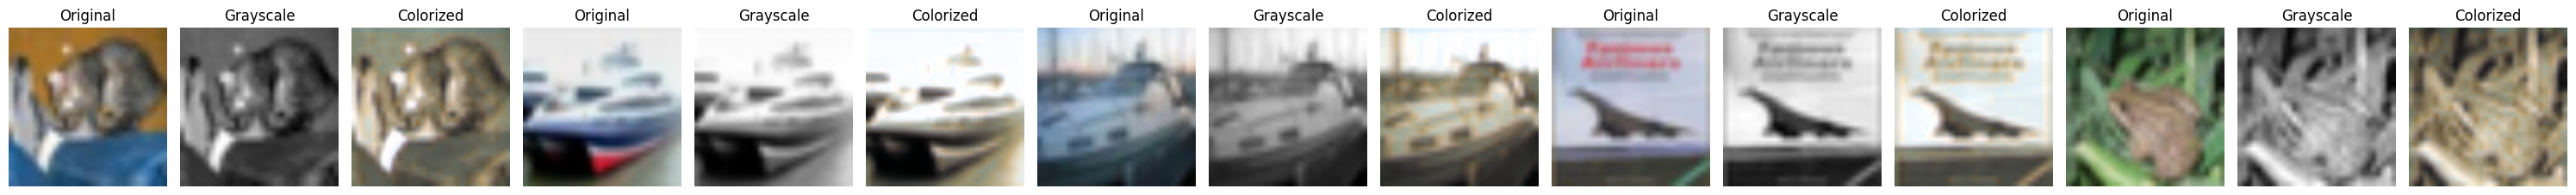

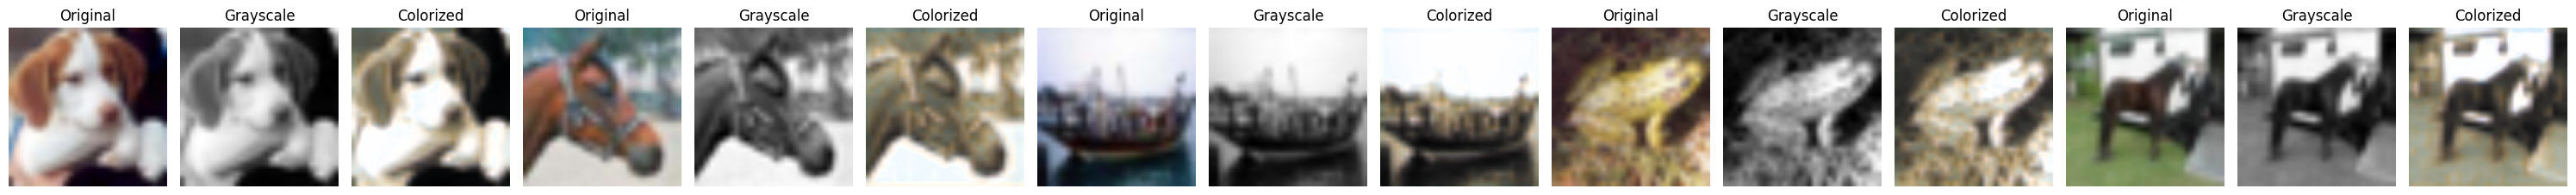

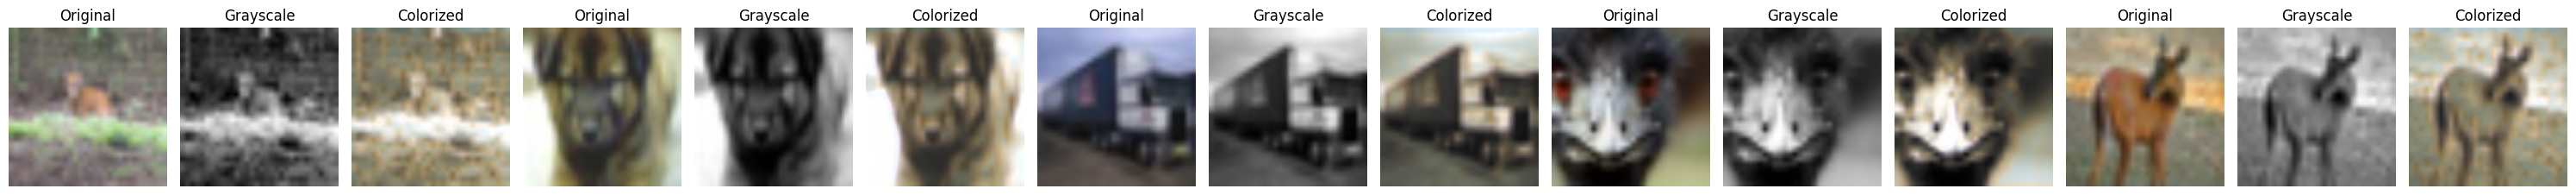

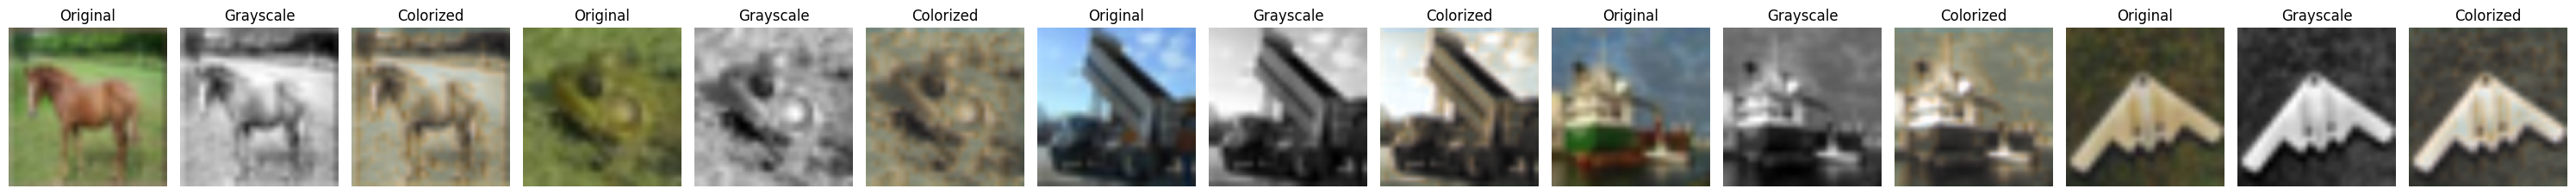

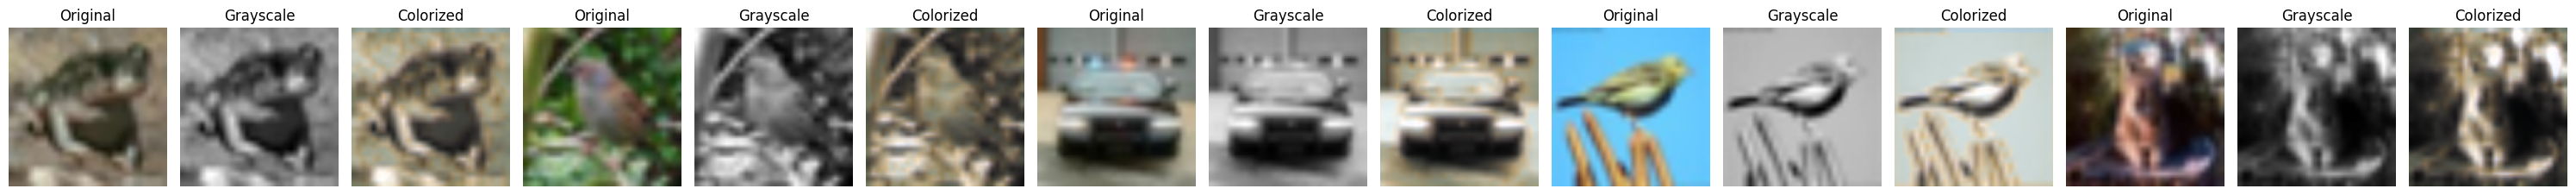

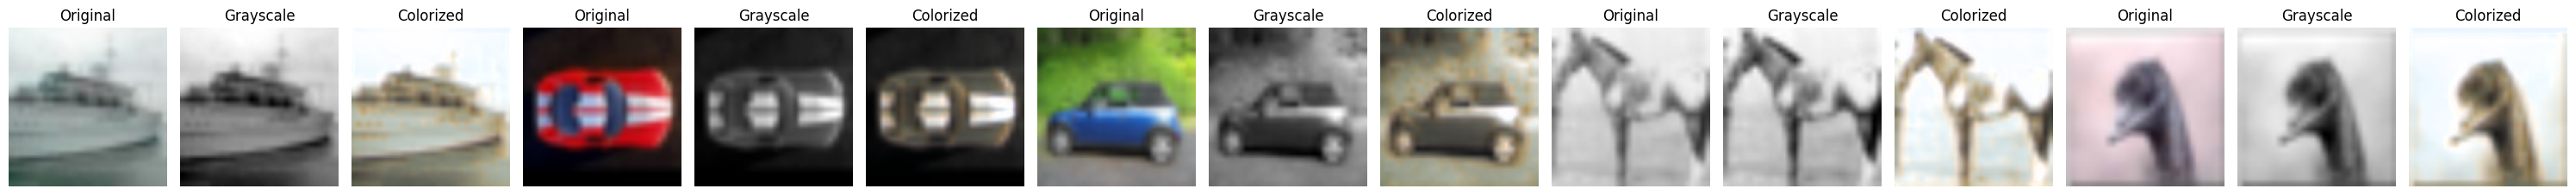

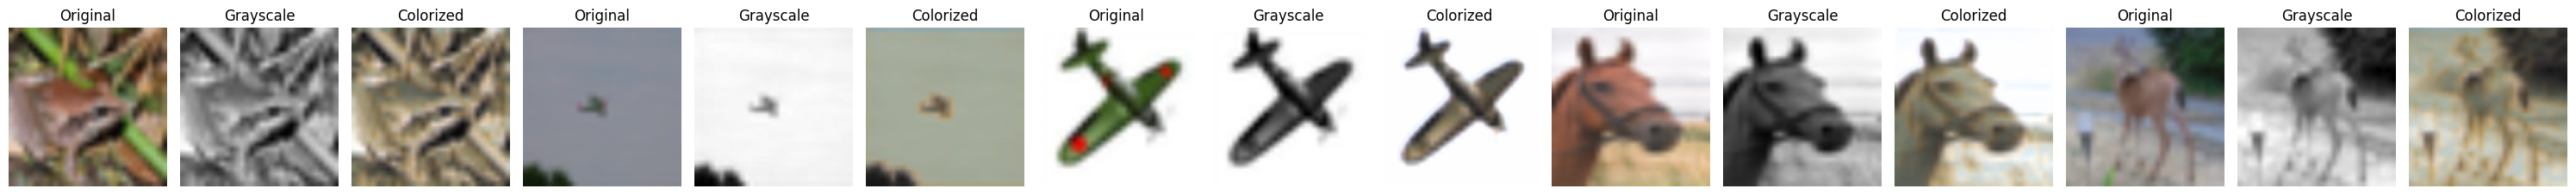

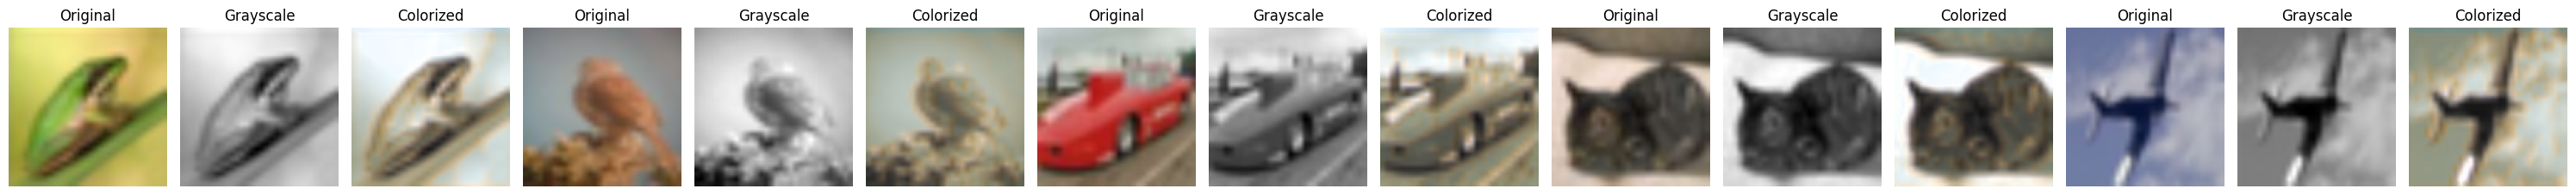

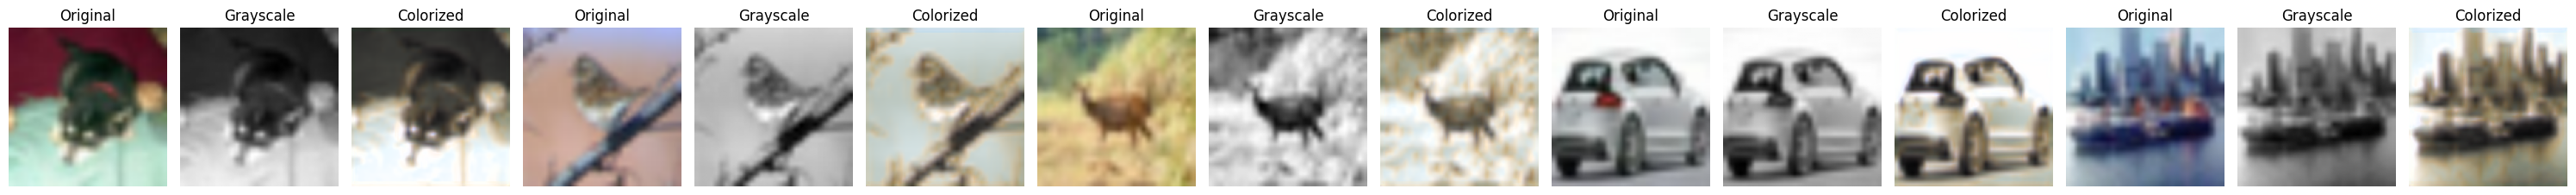

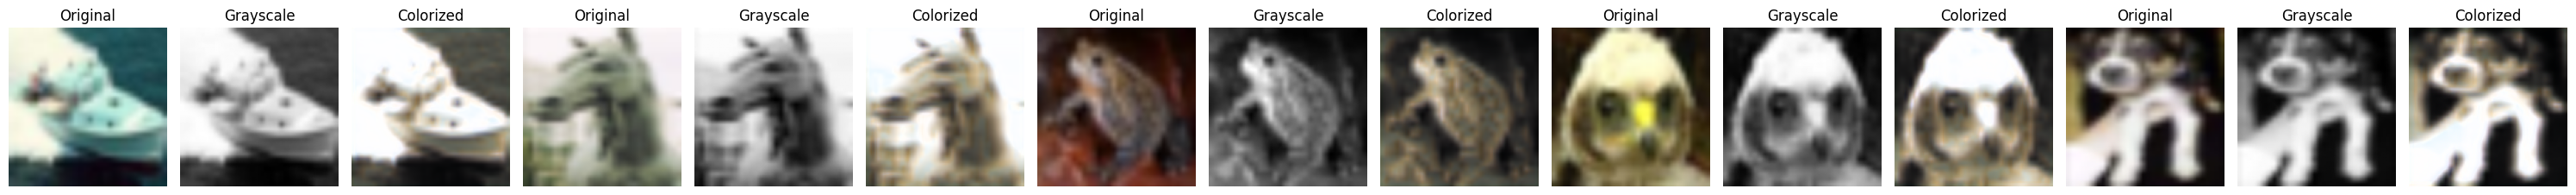

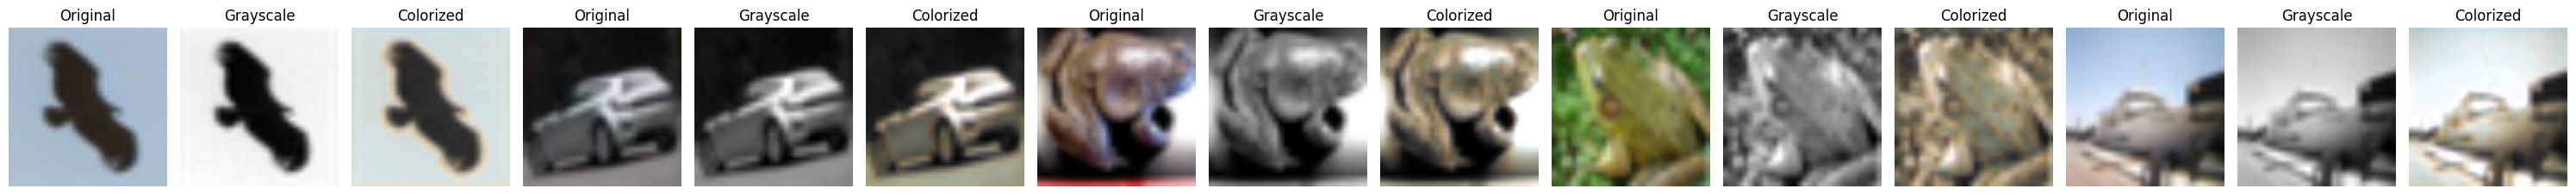

In [ ]:
with torch.no_grad():
    for i, (images, _) in enumerate(test_loader):
        images = images.to(device)
        grayscale_images = rgb_to_gray(images).unsqueeze(1).to(device)

        colorized_images = model(grayscale_images)

        grayscale_images_cpu = grayscale_images.cpu().squeeze(1)
        colorized_images_cpu = colorized_images.cpu()
        original_images_cpu = images.cpu()

        colorized_images_cpu = exaggerate_colors(colorized_images_cpu)

        visualize_all_three(original_images_cpu, grayscale_images_cpu, colorized_images_cpu)

        if i >= 10:
            break

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys(): print("Uploaded file:", filename)

Saving WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg to WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg
Uploaded file: WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg


In [ ]:
import os

files = os.listdir("/content")

print("Files in the current directory:", files)

Files in the current directory: ['.config', 'data', 'WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg', 'sample_data']


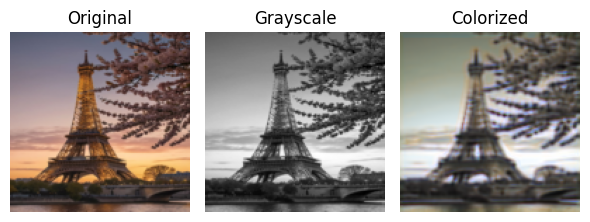

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

# Load the original image from the uploaded file
img_path = 'WhatsApp Image 2026-02-13 at 22.29.16 (1).jpeg'
img = Image.open(img_path).convert('RGB') # Ensure it's RGB for consistency

# Define a transform to convert PIL image to PyTorch Tensor, resized for the model
preprocess_transform = transforms.Compose([
    transforms.Resize((128, 128)), # Resize to the model's expected input size
    transforms.ToTensor()
])

# Apply the transform to the original PIL image to get a tensor
original_img_tensor = preprocess_transform(img).unsqueeze(0).to(device) # Add batch dimension and move to device

# Get the grayscale tensor from the original image tensor
grayscale_input_tensor = rgb_to_gray(original_img_tensor).unsqueeze(1).to(device)

# Set the model to evaluation mode
model.eval()

# Perform colorization
with torch.no_grad():
    colorized_output_tensor = model(grayscale_input_tensor)

# Apply color exaggeration to the colorized output
exaggerated_colorized_tensor = exaggerate_colors(colorized_output_tensor.cpu())

# Visualize the results using the improved visualize_all_three function
# Pass tensors with batch dimension and then let visualize_all_three handle cpu() and permute()
visualize_all_three(
    original_img_tensor.cpu(),
    grayscale_input_tensor.cpu().squeeze(1), # Squeeze channel for grayscale display
    exaggerated_colorized_tensor
)